In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import Series, DataFrame

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
vgsales_df = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')
vgsales_df.sample(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4773,4775,FIFA Soccer 13,PC,2012.0,Action,Electronic Arts,0.02,0.31,0.00,0.07,0.41
6660,6662,Just Dance Kids 2,PS3,2011.0,Misc,Ubisoft,0.10,0.10,0.00,0.04,0.25
11534,11536,Armored Core 3 Portable,PSP,2009.0,Simulation,From Software,0.00,0.00,0.08,0.00,0.08
6568,6570,J-League Pro Soccer Club wo Tsukurou!,SAT,1996.0,Sports,Sega,0.00,0.00,0.26,0.00,0.26
11707,11709,The Hustle: Detroit Streets,PSP,2005.0,Sports,Deep Silver,0.07,0.00,0.00,0.01,0.08
15797,15800,Wall-E,PC,2008.0,Platform,THQ,0.00,0.01,0.00,0.00,0.02
8044,8046,Trauma Team,Wii,NaN,Simulation,Unknown,0.15,0.00,0.02,0.01,0.18
453,454,Borderlands 2,X360,2012.0,Shooter,Take-Two Interactive,1.89,0.91,0.04,0.24,3.07
5909,5911,Star Gladiator Episode: I Final Crusade,PS,1996.0,Fighting,Virgin Interactive,0.07,0.05,0.15,0.02,0.30
5202,5204,NFL GameDay 2001,PS2,2000.0,Sports,Sony Computer Entertainment,0.18,0.14,0.00,0.05,0.36


In [4]:
vgsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Task 1: Scrubbing data types
- converting data to correct dtypes
- check for missing values

Text(0.5, 1.0, 'Cleaned Data')

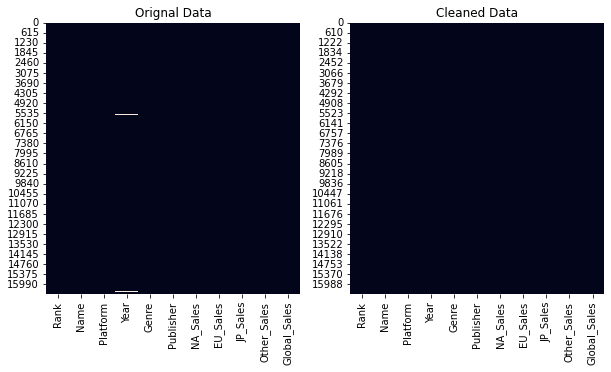

In [5]:
# handling null values
null_df = vgsales_df.isnull()

vgsales_df['Publisher'].fillna('NaN', inplace = True)
vgsales_df.dropna(inplace = True) # remove all entries without year
cleaned_df = vgsales_df.isnull()

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
sns.heatmap(null_df, ax = ax[0], cbar= False)
ax[0].set_title('Orignal Data')
sns.heatmap(cleaned_df, ax = ax[1], cbar = False)
ax[1].set_title('Cleaned Data')

In [6]:
# converting obj col into string type
list_of_str_cols = ['Name', 'Platform', 'Genre', 'Publisher']

for col in list_of_str_cols:
    vgsales_df[col].astype('str')
    
# converting year into int type
vgsales_df['Year'] = vgsales_df['Year'].astype('int64')

vgsales_df.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

## Task 2: EDA 
- Which Genre has the highest sale
- Top 5 platforms with the highest sale
- Which platform has more units sold and do they earned more or less? why?

### Assumption: 
- since "Sales" do not indicate whether they are units sold or gross revenue nor has currentcy used, I am going to assume that they are usd currency for practice purpose.
- Global_Sales = NA_Sales + EU_Sales + JP_Sales + Other_Sales

In [7]:
# grabbing some quick stats for original df
vgsales_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
years = vgsales_df['Year'].unique()
years.sort()
years

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2020])

              Global_Sales
Genre                     
Action             1722.88
Sports             1309.24
Shooter            1026.20
Role-Playing        923.84
Platform            829.15
Misc                797.62
Racing              726.77
Fighting            444.05
Simulation          390.16
Puzzle              242.22
Adventure           234.80
Strategy            173.43


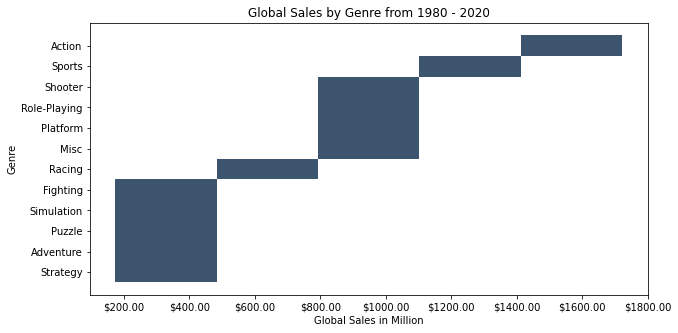

In [9]:
# Which Genre has the highest sale Global
group_by_genre = vgsales_df.groupby('Genre')['Global_Sales'].sum()
group_by_genre = pd.DataFrame(group_by_genre) # convert to df so can easier to plot
group_by_genre.sort_values(by = 'Global_Sales', ascending = False, inplace = True)
print(group_by_genre)

plt.subplots(figsize = (10,5))
plot = sns.histplot(data = group_by_genre, x = 'Global_Sales', y = "Genre")
plt.xlabel('Global Sales in Million')
plt.title('Global Sales by Genre from 1980 - 2020')
plot.xaxis.set_major_formatter('${x:1.2f}')

from the chart, we can infer Action, Sport and Shooter games out sale others genre globally.

In [10]:
# which genre is the highest sale in each country

list_of_country = vgsales_df.columns[-5:-1]
sales_by_country = pd.DataFrame(columns = ['Country', 'Genre', 'Sale'])

for country in list_of_country:
    sale = vgsales_df.groupby('Genre')[country].sum()
    sale.sort_values(ascending = False, inplace = True)
    
    genre = sale[:1].index[0]
    total = sale[:1].values[0]
    sales_by_country.loc[len(sales_by_country)] = [country, genre, total]

sales_by_country

,Country,Genre,Sale
0,NA_Sales,Action,861.80
1,EU_Sales,Action,516.48
2,JP_Sales,Role-Playing,350.29
3,Other_Sales,Action,184.92


from this table, we can safely say that Action genre sales is strongest globally aside for Japan

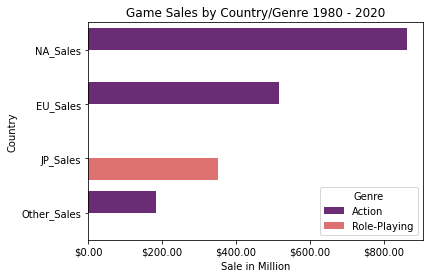

In [11]:
# bar plot with annotation
plot = sns.barplot(data = sales_by_country, x = 'Sale', y = 'Country', orient = 'h', palette = 'magma', hue = 'Genre')
plt.xlabel('Sale in Million')
plt.title('Game Sales by Country/Genre 1980 - 2020')
plot.xaxis.set_major_formatter('${x:1.2f}')

Platform
PS2     1233.46
X360     969.61
PS3      949.35
Wii      909.81
DS       818.96
Name: Global_Sales, dtype: float64


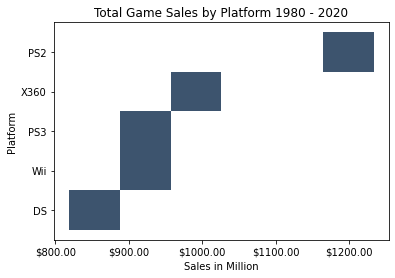

In [12]:
# top 5 platforms with highest game sales? 

group_by_platform = vgsales_df.groupby('Platform')['Global_Sales'].sum()
group_by_platform.sort_values(ascending = False, inplace = True)

print(group_by_platform[:5])

top_5_by_platform = pd.DataFrame(group_by_platform[:5])

plot = sns.histplot(data = top_5_by_platform, x = 'Global_Sales', y = 'Platform')
plt.title('Total Game Sales by Platform 1980 - 2020')
plt.xlabel('Sales in Million')
plot.xaxis.set_major_formatter('${x:1.2f}')

PS2 seem to have the lead on all platforms during this time span

  Platform  Game_Count
0       DS        2133
1      PS2        2127
2      PS3        1304
3      Wii        1290
4     X360        1235


Text(0, 0.5, 'Total Released')

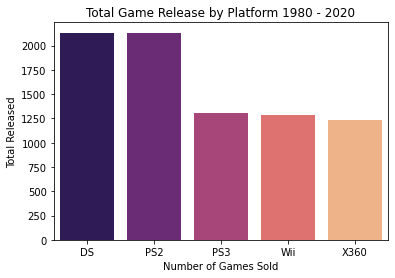

In [13]:
# how many games each top 5 platforms sold during this time frame
game_sold_by_platf = vgsales_df['Platform'].value_counts()
game_sold_by_platf.sort_values(ascending = False, inplace = True)
top_5_dict = {'Platform': game_sold_by_platf[:5].index, 'Game_Count': game_sold_by_platf[:5].values}
top_5_game_sold = pd.DataFrame(top_5_dict)
print(top_5_game_sold)

plot = sns.barplot(data = top_5_game_sold, x = 'Platform', y = 'Game_Count', palette = 'magma')
plt.title('Total Game Release by Platform 1980 - 2020')
plt.xlabel('Number of Games Sold')
plt.ylabel('Total Released')

Interestingly N DS had more games released than S PS2 in the same time period. However, above chart indicates N DS grossing the lowest out of the top 5 platforms. There are a couple of theories:
- maybe game prices for each N DS are much lower per unit compare to S PS2. I.e 29.99 usd vs 49.99 usd per game. 
- possibly S PS2 has game titles that out sale N DS titles 

In [14]:
# calc means for Global_Sales between PS2 and DS
num_ds_games = len(vgsales_df[vgsales_df['Platform'] == 'DS']) 
num_ps2_games = game_sold_by_platf[game_sold_by_platf.index == 'PS2'].values[0]

print('DS games released: {} \nPS2 games released: {}'.format(num_ds_games, num_ps2_games))

print('Est. of units sold on PS2: {}'.format(round(((1233.46 * 1000000) / 49.99)))) # PS2 1233.46 total global sales in million
print('Est. of units sold on DS: {}'.format(round(((818.96 * 1000000) / 29.99)))) # DS 818.96 total global sales in million

DS games released: 2133 
PS2 games released: 2127
Est. of units sold on PS2: 24674135
Est. of units sold on DS: 27307769


Not only DS had more games released on its platform, it also sold more units than PS2. However, gross revenue difference can be related to price differences per game unit for each platform. 